# Kaggle Competition - Digit Recognizer - Model 3

**All notebooks will have the same EDA and Preprocessing. The difference in each notebook will begin at section IV - Model Creation**


I am doing the digit recognizer competition on Kaggle. This competiton is aimed at predicting digits (0-9) from images of handwritten numbers. We will be judged on accuracy in this competition. 

I will be building a variety of Convolutional Neural Network (CNN) models for this competition, these are the most commonly used model for image recognition. CNNs are a deep learning model that are similar to the ANN model we learned in class. CNNs include both an input an output layer, just like ANNs. CNNs also have hidden layers that can include pooling layers, convolutional layers, dense layers and normalization layers. I will get into more detail about these layers in my code examples for each model.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Sources and links

Competition - https://www.kaggle.com/c/digit-recognizer/data

Documentation - https://keras.io/models/sequential/ , https://keras.io/getting-started/sequential-model-guide/ , https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f


# EDA and Data Prep

**EDA and prep will not change between models. The Model Creation portion of this code is the only thing that will change throughout each notebook.**

### Import Data and create file for output.

In [3]:
#import packages
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [6]:
#read in train data
train = pd.read_csv("C:/Users/ST034045/OneDrive - Cerner Corporation/Documents/Rockhurst Data Science/predictivemodels2/final project/train.csv", sep=',')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#read in test data
test = pd.read_csv("C:/Users/ST034045/OneDrive - Cerner Corporation/Documents/Rockhurst Data Science/predictivemodels2/final project/test.csv", sep=',')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#create file for submission
output = "submissionCNN3.csv"

Now let's take a look at our training data.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


There are 785 entries (label + 784 pixel colummns) as expected and outline in the Kaggle data description.

### Check for NULLs

In [10]:
train.isna().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [11]:
test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There are no NULLs we need to replace or remove.

### Visualize data

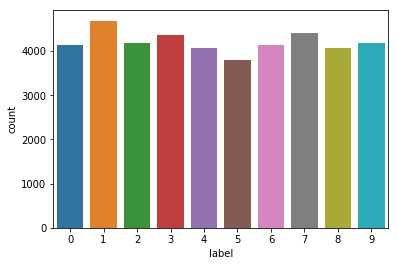

In [12]:
labels = sns.countplot(train["label"])

It looks like the digit drawings are evenly distributed throughout the dataset.

### Split data to features and targets

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(
    train.iloc[:,1:].values, train.iloc[:,0].values, test_size=0.20, random_state=43)

In [14]:
#check the shapes
print(X_val.shape)
print(X_train.shape)
print(Y_val.shape)
print(Y_train.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)


CNN requires reshaping the data so it is viewed as a 28x28 square, so we can see the digit drawing.

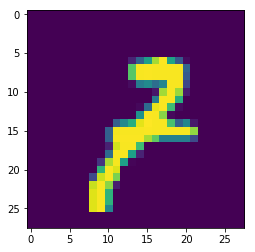

In [15]:
digit = plt.imshow(X_train[0].reshape(28,28))

Looks like the first digit in our training data set is a 7.

### Reshape data

Now I need to reshape all of the data so it's read the same way as the digit shown above. MNIST is a gray scale data set, which requires adding one dimension at the end (hence why we have it as (28x28x1). If the data was RBG, I would use a 3 instead of 1.

In [16]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

### Normalize on 0-1 Scale
The CNN can run on non-normalized data, however, changing it to a 0-1 scale will increase perfomance and the model will run faster than if the data remained 0-255.

In [17]:
X_train = X_train.astype("float32")/255.
X_val = X_val.astype("float32")/255.

### Encode target variable

We have to one-hot code the target variable. Instead of the label being a number between 0-9, this will convert each label to an array of 0s and 1s, with the 1 being in the position on the array that corresponds with the digit. 

For example: 2 becomes [0,0,1,0,0,0,0,0,0,0]. Printed example below

In [18]:
Y_train = to_categorical(Y_train)
Y_val  = to_categorical(Y_val)

print(Y_train[3])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Model Creation

## Convolutional Neural Network 3

First we set the batch_size, num_classes, and epochs before building or compiling the model.

**Batch size** will define the number of samples that will be propogated through the network. I will change this from Model 2 to a larger number. Since the total number is samples I have is pretty high, I will not make the batch size as large as my sample size. https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network



**Epochs** are how many times we will train the model. Also can be said as one forward pass and one backward pass of all the training examples. Lower epochs will help the model run much quicker, but will not get as high accuracy. Accuracy increases as you go through epochs.

**Num classes** will stay at 10. This is how many classes there are to predict (0-9).

In [19]:
batch_size = 100  #default is 32
num_classes = 10
epochs = 15

Now we build the sequential model with convolutional layers and max pooling added. 

**MaxPooling layer** is a form of subsampling. In the pooling layer, the pooling size is determined. Max pooling takes the maximum value from a neighborhood of pixels. This can aid in preventing or reducing overfitting.

**Dropout layer** will reduce overfitting by randomly switching off neurons in the network and guiding the data to find new paths. The goal of dropout layers is to reduce model complexity. If you set half of activtations to zero, the neural network cannot use those activations in the foward passes during training.

In this model the first dropout layer randomly deactivates 25%. The second deactivates 50%.
https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer

**Flatten layer** Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.
https://www.quora.com/What-is-the-meaning-of-flattening-step-in-a-convolutional-neural-network


**Dense** layers are used for class prediction.  This is the classifier layer

In [20]:
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

model = Sequential()
#1st convolutional layer with 16 nodes and a kernel size (filter matrix) of 5x5
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu', #(rectified linear activation) works well in neural networks
                 input_shape=(28,28,1))) #only need to specify input shape in 1st layer

#2nd convolutional layer with 32 nodes and a kernel size of 3x3
model.add(Conv2D(32, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(3, 3))) #subsampling layer
model.add(Dropout(0.25)) #regularization to reduce overfitting
model.add(Flatten()) #flatten layer to single long vector to prep for classification in dense layer
model.add(Dense(100, activation='relu')) #classifier layer
model.add(Dropout(0.5)) #regularization
model.add(Dense(num_classes, activation='softmax')) 
#softmax makes output sum to 1 so they can be interpreted as probabilities


Now I'll compile the model. This takes into account three parameters:

**optimizer** - controls our learning rate. From towardsdatascience - The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer. "adam" optimizer adjusts the learning rate throughout training - will try adam in model 4.

**loss** - categorical crossentropy is the most common loss function to use for classification purposes.

**metrics** - I will use the accuracy metric, this is what the Kaggle competition uses to evaluate my model's performance.

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='keras.optimizers.Adadelta()',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, Y_val))
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
33600/33600 [==============================] - 79s 2ms/step - loss: 0.4205 - acc: 0.8682 - val_loss: 0.0909 - val_acc: 0.9737
Epoch 2/15
33600/33600 [==============================] - 79s 2ms/step - loss: 0.1449 - acc: 0.9574 - val_loss: 0.0616 - val_acc: 0.9808
Epoch 3/15
33600/33600 [==============================] - 76s 2ms/step - loss: 0.1083 - acc: 0.9680 - val_loss: 0.0502 - val_acc: 0.9827
Epoch 4/15
33600/33600 [==============================] - 78s 2ms/step - loss: 0.0899 - acc: 0.9729 - val_loss: 0.0481 - val_acc: 0.9846
Epoch 5/15
33600/33600 [==============================] - 85s 3ms/step - loss: 0.0823 - acc: 0.9760 - val_loss: 0.0411 - val_acc: 0.9865
Epoch 6/15
33600/33600 [==============================] - 87s 3ms/step - loss: 0.0752 - acc: 0.9785 - val_loss: 0.0403 - val_acc: 0.9873
Epoch 7/15
33600/33600 [==============================] - 81s 2ms/step - loss: 0.0680 - acc: 0.9795 - val_loss: 0.0387 - val_acc:

## Evaluate

In [22]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0347, final accuracy: 0.9888


Final overall accuracy is about 98.88%, this is good, but is not as high as the 99.7% achieved in the example Model 1 I first looked at. I will try to improve this in further models.

Confusion matrix below:

In [23]:
Y_hat = model.predict(X_val)
y_pred = np.argmax(Y_hat, axis=1)
y_true = np.argmax(Y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[845   0   0   0   0   0   3   0   2   0]
 [  0 900   2   0   1   0   0   1   1   0]
 [  0   0 829   0   1   0   0   2   2   1]
 [  0   0   1 825   0  10   0   1   1   1]
 [  0   1   0   0 796   0   0   2   1   6]
 [  0   0   0   1   0 778   0   0   0   0]
 [  1   1   1   0   0   0 842   0   1   0]
 [  0   1   5   0   0   0   0 849   1   2]
 [  2   4   2   0   3   1   1   1 805   2]
 [  4   1   0   1   4   2   0   7   5 837]]


This CNN model actually did better than Model 1 and 2 on the "4" vs. "9" problem. It is guessing fewer "9s" as "4s" than previous models.

## Submit

Now I'll run this model on the test data and create a submission csv with my predictions.

In [24]:
mnist_testset1 = test
x_test1 = mnist_testset1.astype("float32")
x_test1 = x_test1.values.reshape(-1, 28, 28, 1)/255.

In [25]:
y_hat = model.predict(x_test1, batch_size=64)

In [26]:
y_pred = np.argmax(y_hat,axis=1)

In [27]:
with open(output, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>